### Ranked m6A-sites validated by m6A-seq

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import os

met_peak="/home/wuyou/Projects/paper/rice/nbt_yuqiong/GSE135549_Nipp_shoot_rep2_gene_MeTPeak.bed"   


m6A_predict="/home/wuyou/Projects/paper/rice/predict/WT_m6A.predict.genome_loc.merge.tsv"
#out=open("data/WT_m6A.predict.genome_loc.merge.mod_sites.tsv","w")





In [4]:
def write_top_mod_sites(mod_dict, output_file, top_count):
    with open(output_file, "w") as out:
        for i, id in enumerate(mod_dict):
            if i == top_count:
                break
            out.write(id)

            
# Define mod_dict containing mod site IDs
mod_dict={}
with open(m6A_predict) as f:
    for line in f:
        gene=line.split("\t")[0].split(".")[0]
        Chr=line.split("\t")[3]
        start=line.split("\t")[4]
        end=line.split("\t")[4]
        
        motif=line.split("\t")[2]
        mod_count=int(line.split("\t")[11])
        unmod_count=int(line.split("\t")[12])
        if unmod_count>10 and mod_count/unmod_count>0.3:
            id="%s\t%s\t%s\n" %(Chr,start,end)
            mod_rate=mod_count/unmod_count
            mod_dict[id]=[mod_rate,motif]
#sort 
mod_dict=dict(sorted(mod_dict.items(), key=lambda item: item[1][0],reverse=True))


# Define the respective top counts for each output file
top_counts = [100, 500, 1000, 2000, 5000, 10000, 20000]

# Write the top mod sites for each output file using a for loop
for top_count in top_counts:
    output_file = "data/mod_sites.top%s.tsv" %top_count
    write_top_mod_sites(mod_dict, output_file, top_count)
    cmd="~/.conda/envs/SQANTI3.env/bin/bedtools intersect -a %s -b %s  -wa >data/temp_overlap" %(output_file,met_peak)
    #print(cmd)
    os.system(cmd)
    cmd="wc -l data/temp_overlap"
    print("Top modifid sites:", top_count, "\t\tOverlap with m6ASeq:",os.popen(cmd).read().split(" ")[0])

Top modifid sites: 100 		Overlap with m6ASeq: 87
Top modifid sites: 500 		Overlap with m6ASeq: 412
Top modifid sites: 1000 		Overlap with m6ASeq: 777
Top modifid sites: 2000 		Overlap with m6ASeq: 1481
Top modifid sites: 5000 		Overlap with m6ASeq: 3280
Top modifid sites: 10000 		Overlap with m6ASeq: 5578
Top modifid sites: 20000 		Overlap with m6ASeq: 9228


  Top predicted sites  Proportion of sites\nvalidated by m6A-seq
0                 100                                     0.8700
1                 500                                     0.8240
2                1000                                     0.7770
3                2000                                     0.7405
4                5000                                     0.6560
5               10000                                     0.5578
6               20000                                     0.4614


/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


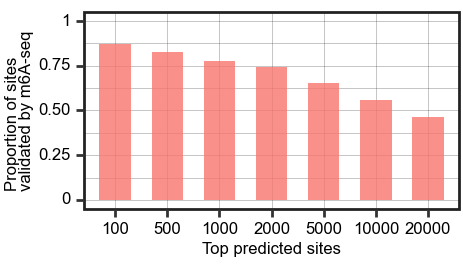

/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 2.32 x 1.33 in image.
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: figure/figure_6b_rice_top_postions_validated_by_m6A-seq.pdf
/home/wuyou/.conda/envs/sc/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


In [5]:
#plot

import pandas as pd
from plotnine import *
import numpy as np

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'

c1="#F8766D"
c2="#00BA38"
c3="#619CFF"

"""
100 87
500 412
1000 777
2000 1481
5000 3280
10000 5578
20000 9228
"""

X=["100","500","1000","2000","5000","10000","20000"]
Y=[87/100,412/500,777/1000,1481/2000,3280/5000,5578/10000,9228/20000]
#Y=np.log2(Y_curcake)
data=pd.DataFrame({"Top predicted sites":X,"Proportion of sites\nvalidated by m6A-seq":Y})

data['Top predicted sites'] = pd.Categorical(data['Top predicted sites'], categories=pd.unique(data['Top predicted sites']))

print(data)
p1 = (ggplot()
        +geom_bar(data,aes(x="Top predicted sites",y = "Proportion of sites\nvalidated by m6A-seq"),stat="identity",position="stack",alpha=0.8,width=0.6,fill=c1)
        +scale_fill_manual(values=[gray,c1])
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            
            #axis_text_x=element_text(rotation=45, hjust=0.5),
            figure_size=[2.32,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.60,0.4),
               
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            
            legend_position=None,
            legend_key_size=4) #change legend text font size
        #+labs(x = "Kmer length", y ="sequence coverage")
        +guides(color = guide_legend(title = "Probability cutoff"))
        #+ ggtitle("curlcake")
      +ylim([0,1])
      +scale_color_manual(c1)
     )
print(p1)

p1.save('figure/figure_6b_rice_top_postions_validated_by_m6A-seq.pdf')